In [4]:
import pandas as pd
import numpy as np
import datetime
import warnings

warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_columns', None)

## Case Study: Healthcare for All 
[Link Week 9](https://my.ironhack.com/cohorts/6234aa2a0d4f4d002c74b042/lms/courses/course-v1:IRONHACK+DAPT+202304_MEXRMT/modules/ironhack-course-chapter_9/units/ironhack-course-chapter_9-sequential_2-vertical_1) | [Link Week 1](https://my.ironhack.com/lms/courses/course-v1:IRONHACK+DAPT+202304_MEXRMT/modules/ironhack-course-chapter_1/units/ironhack-course-chapter_1-sequential_1-vertical_1)

Goal: Predict the gift amount (AVGGIFT) the organizations needs to send to their donors so they keep donating.

In [5]:
#load data
data = pd.read_csv('unit4.csv')
print(data.shape)
data.head()

(90569, 28)


,STATE,PVASTATE,DOB,MDMAUD,RECP3,GENDER,DOMAIN,INCOME,HOMEOWNR,HV1,HV2,HV3,HV4,IC1,IC2,IC3,IC4,IC5,VETERANS,NUMPROM,CARDPROM,CARDPM12,NUMPRM12,MAXADATE,RFA_2,NGIFTALL,TIMELAG,AVGGIFT
0,IL,,3712,XXXX,,F,T2,NaN,,479,635,3,2,307,318,349,378,12883,,74,27,6,14,9702,L4E,31,4.0,7.741935
1,CA,,5202,XXXX,,M,S1,6.0,H,5468,5218,12,10,1088,1096,1026,1037,36175,,32,12,6,13,9702,L2G,3,18.0,15.666667
2,NC,,0,XXXX,,M,R2,3.0,U,497,546,2,1,251,292,292,340,11576,,63,26,6,14,9702,L4E,27,12.0,7.481481
3,CA,,2801,XXXX,,F,R2,1.0,U,1000,1263,2,1,386,388,396,423,15130,,66,27,6,14,9702,L4E,16,9.0,6.812500
4,FL,,2001,XXXX,X,F,S2,3.0,H,576,594,4,3,240,250,293,321,9836,,113,43,10,25,9702,L2F,37,14.0,6.864865


In [6]:
def standardize_columns(df):
    new_cols=[]
    for col in df.columns:
        col = col.lower().replace(' ','_')
        new_cols.append(col)
    df.columns = new_cols
    return df

In [7]:
data = standardize_columns(data)
data.head()

,state,pvastate,dob,mdmaud,recp3,gender,domain,income,homeownr,hv1,hv2,hv3,hv4,ic1,ic2,ic3,ic4,ic5,veterans,numprom,cardprom,cardpm12,numprm12,maxadate,rfa_2,ngiftall,timelag,avggift
0,IL,,3712,XXXX,,F,T2,NaN,,479,635,3,2,307,318,349,378,12883,,74,27,6,14,9702,L4E,31,4.0,7.741935
1,CA,,5202,XXXX,,M,S1,6.0,H,5468,5218,12,10,1088,1096,1026,1037,36175,,32,12,6,13,9702,L2G,3,18.0,15.666667
2,NC,,0,XXXX,,M,R2,3.0,U,497,546,2,1,251,292,292,340,11576,,63,26,6,14,9702,L4E,27,12.0,7.481481
3,CA,,2801,XXXX,,F,R2,1.0,U,1000,1263,2,1,386,388,396,423,15130,,66,27,6,14,9702,L4E,16,9.0,6.812500
4,FL,,2001,XXXX,X,F,S2,3.0,H,576,594,4,3,240,250,293,321,9836,,113,43,10,25,9702,L2F,37,14.0,6.864865


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90569 entries, 0 to 90568
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   state     90569 non-null  object 
 1   pvastate  90569 non-null  object 
 2   dob       90569 non-null  int64  
 3   mdmaud    90569 non-null  object 
 4   recp3     90569 non-null  object 
 5   gender    90569 non-null  object 
 6   domain    90569 non-null  object 
 7   income    70386 non-null  float64
 8   homeownr  90569 non-null  object 
 9   hv1       90569 non-null  int64  
 10  hv2       90569 non-null  int64  
 11  hv3       90569 non-null  int64  
 12  hv4       90569 non-null  int64  
 13  ic1       90569 non-null  int64  
 14  ic2       90569 non-null  int64  
 15  ic3       90569 non-null  int64  
 16  ic4       90569 non-null  int64  
 17  ic5       90569 non-null  int64  
 18  veterans  90569 non-null  object 
 19  numprom   90569 non-null  int64  
 20  cardprom  90569 non-null  in

In [9]:
data.isnull().sum()/len(data)

state       0.000000
pvastate    0.000000
dob         0.000000
mdmaud      0.000000
recp3       0.000000
gender      0.000000
domain      0.000000
income      0.222847
homeownr    0.000000
hv1         0.000000
hv2         0.000000
hv3         0.000000
hv4         0.000000
ic1         0.000000
ic2         0.000000
ic3         0.000000
ic4         0.000000
ic5         0.000000
veterans    0.000000
numprom     0.000000
cardprom    0.000000
cardpm12    0.000000
numprm12    0.000000
maxadate    0.000000
rfa_2       0.000000
ngiftall    0.000000
timelag     0.106582
avggift     0.000000
dtype: float64

In [11]:
#Numerical columns
numericals = data.select_dtypes(np.number)
numericals.head()

,dob,income,hv1,hv2,hv3,hv4,ic1,ic2,ic3,ic4,ic5,numprom,cardprom,cardpm12,numprm12,maxadate,ngiftall,timelag,avggift
0,3712,NaN,479,635,3,2,307,318,349,378,12883,74,27,6,14,9702,31,4.0,7.741935
1,5202,6.0,5468,5218,12,10,1088,1096,1026,1037,36175,32,12,6,13,9702,3,18.0,15.666667
2,0,3.0,497,546,2,1,251,292,292,340,11576,63,26,6,14,9702,27,12.0,7.481481
3,2801,1.0,1000,1263,2,1,386,388,396,423,15130,66,27,6,14,9702,16,9.0,6.812500
4,2001,3.0,576,594,4,3,240,250,293,321,9836,113,43,10,25,9702,37,14.0,6.864865


In [12]:
numericals.isnull().sum()

dob             0
income      20183
hv1             0
hv2             0
hv3             0
hv4             0
ic1             0
ic2             0
ic3             0
ic4             0
ic5             0
numprom         0
cardprom        0
cardpm12        0
numprm12        0
maxadate        0
ngiftall        0
timelag      9653
avggift         0
dtype: int64

IMPORTANT: We are going to work with the complete dataset in this exercise, but when dealing with real world problems, remember we always train test split first to avoid [data leakage](https://www.kaggle.com/code/alexisbcook/data-leakage/tutorial)

<Axes: >

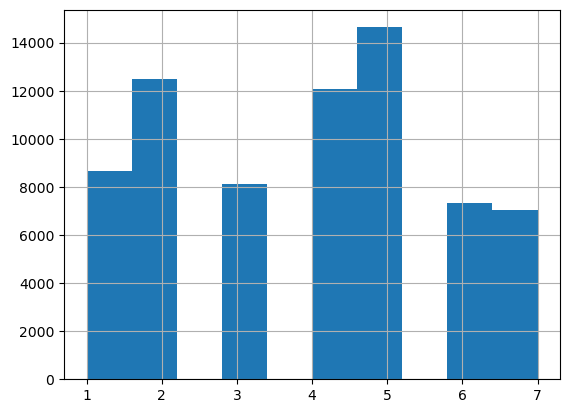

In [13]:
#Income
numericals['income'].hist()

In [29]:
numericals.income.value_counts()

5.0    14639
2.0    12482
4.0    12092
1.0     8646
3.0     8135
6.0     7347
7.0     7045
Name: income, dtype: int64

In [14]:
numericals['income'].unique()

array([nan,  6.,  3.,  1.,  4.,  2.,  7.,  5.])

In [15]:
numericals['income'].nunique()

7

In [16]:
numericals['income'].mean()

3.8782570397522234

(0.0, 25000.0)

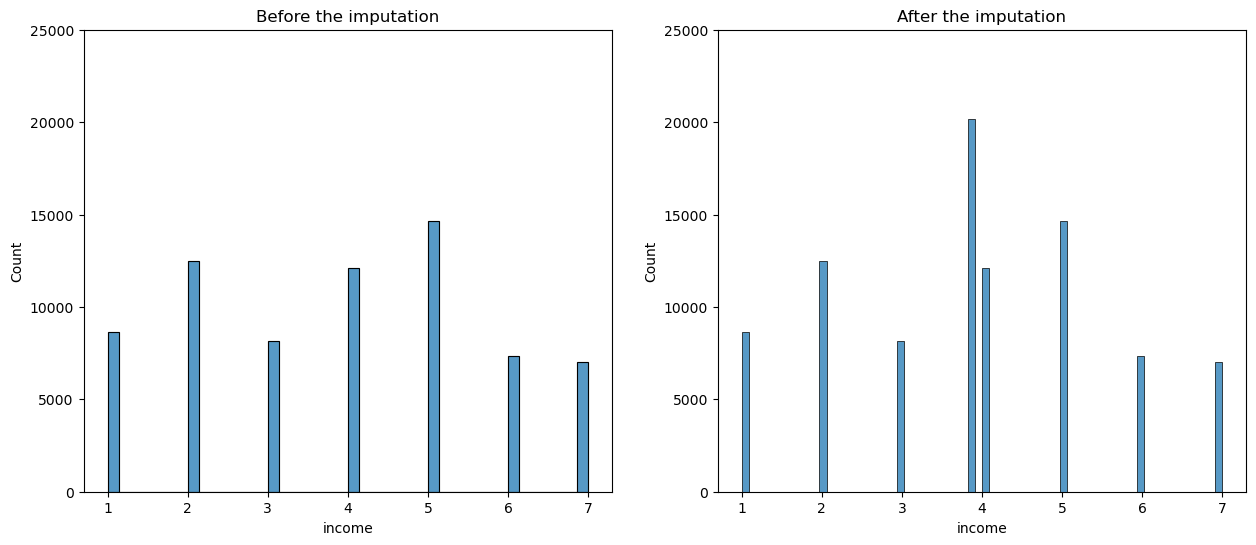

In [21]:
fig, ax = plt.subplots(1,2, figsize=(15,6))
sns.histplot(x="income", data=numericals, ax=ax[0])
ax[0].set_title("Before the imputation")
ax[0].set_ylim((0,25000))
new = numericals['income'].fillna(numericals['income'].mean())
sns.histplot(x=new, ax= ax[1])
ax[1].set_title("After the imputation")
ax[1].set_ylim((0,25000))

In [22]:
new.value_counts()

3.878257    20183
5.000000    14639
2.000000    12482
4.000000    12092
1.000000     8646
3.000000     8135
6.000000     7347
7.000000     7045
Name: income, dtype: int64

(0.0, 35000.0)

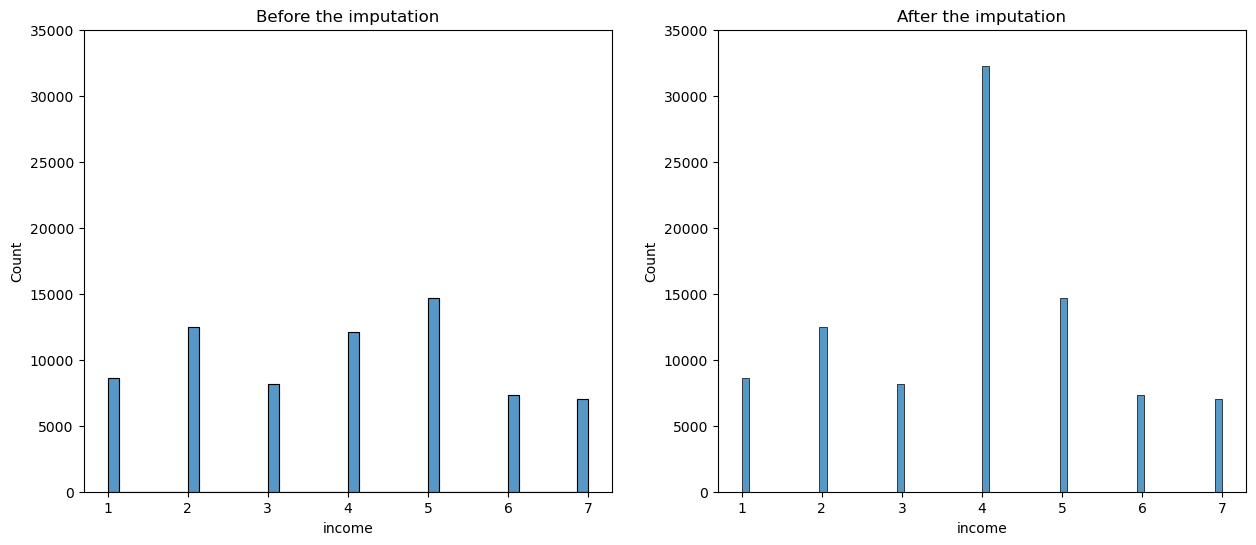

In [27]:
fig, ax = plt.subplots(1,2, figsize=(15,6))
sns.histplot(x="income", data=numericals, ax=ax[0])
ax[0].set_title("Before the imputation")
ax[0].set_ylim((0,35000))
new_round = numericals['income'].fillna(round(numericals['income'].mean()))
sns.histplot(x=new, ax=ax[1])
ax[1].set_title("After the imputation")
ax[1].set_ylim((0,35000))

In [28]:
new_round.value_counts()

4.0    32275
5.0    14639
2.0    12482
1.0     8646
3.0     8135
6.0     7347
7.0     7045
Name: income, dtype: int64

In [33]:
def compare_imputation(col,df,new_column):
    if max(df[col].value_counts())>max(new_column.value_counts()):
        limit = max(df[col].value_counts())*1.25
    else:
        limit = max(new_column.value_counts())*1.25
    
    fig, ax = plt.subplots(1,2, figsize=(15,6))
    sns.histplot(x=col, data=df, ax=ax[0])
    ax[0].set_title("Before the imputation")
    ax[0].set_ylim((0,limit))
    sns.histplot(x=new_column, ax=ax[1])
    ax[1].set_title("After the imputation")
    ax[1].set_ylim((0,limit))
    plt.show()

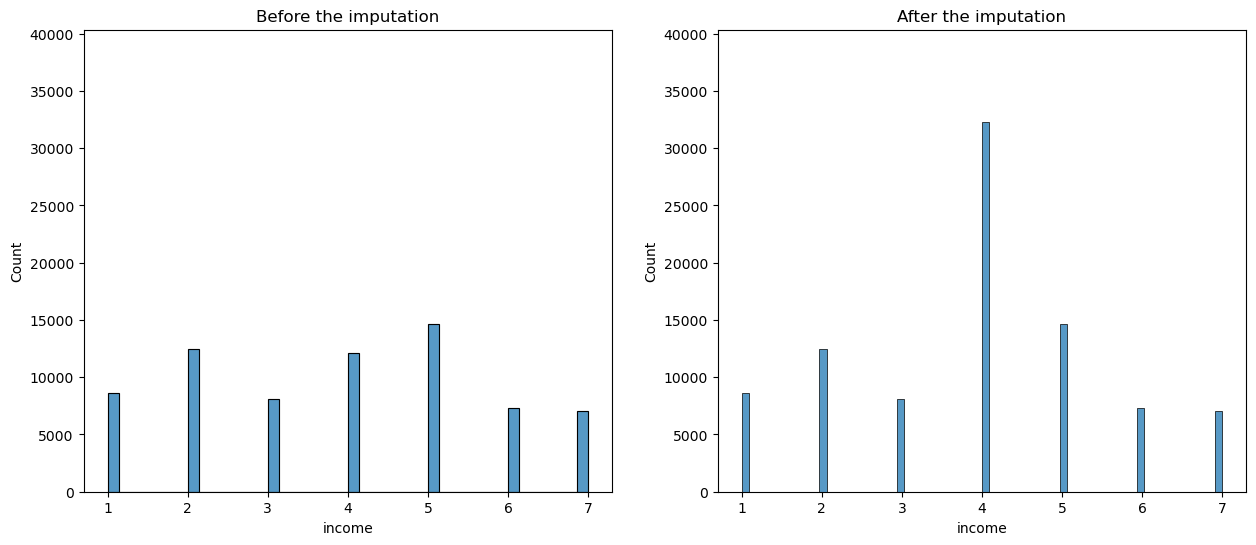

In [35]:
compare_imputation('income',numericals,new_round)

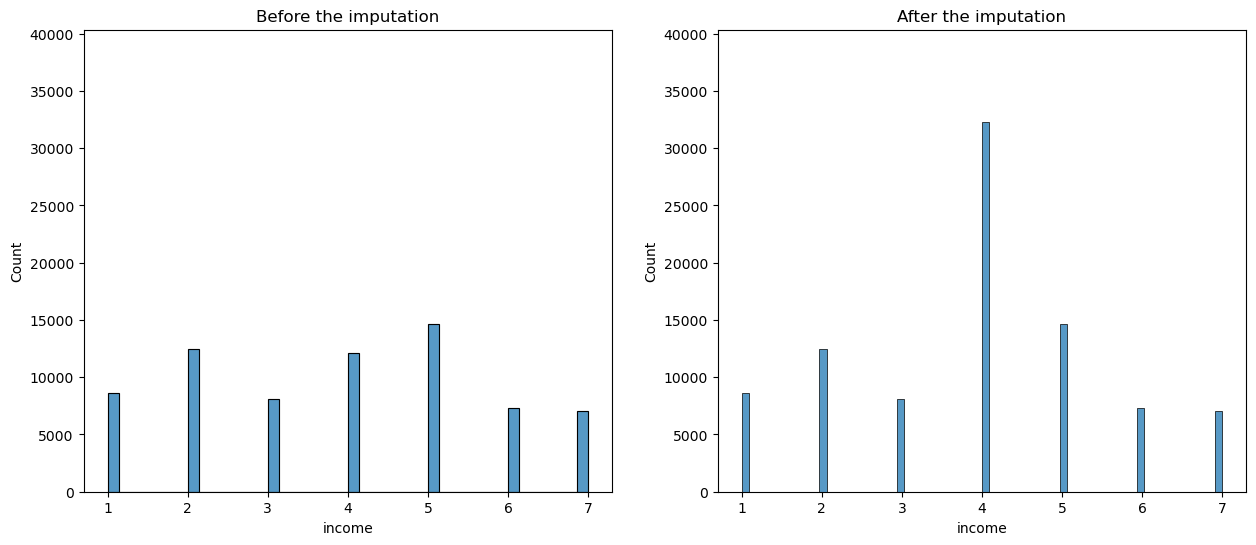

In [36]:
new_median = numericals.income.fillna(numericals.income.median())
compare_imputation('income', numericals, new_median)

We are going to use interpolate(), a method from pandas [Documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.interpolate.html)

Other libraries also include ways to interpolate values:

- [scipy.interpolate](https://docs.scipy.org/doc/scipy/tutorial/interpolate.html), [1D interpolation methods](https://docs.scipy.org/doc/scipy/tutorial/interpolate/1D.html)
- [sklearn.impute](https://scikit-learn.org/stable/modules/impute.html#impute)


In [43]:
s = pd.Series([0,1,np.nan,3,6,9,np.nan,16])
s

0     0.0
1     1.0
2     NaN
3     3.0
4     6.0
5     9.0
6     NaN
7    16.0
dtype: float64

In [41]:
s.interpolate(method='linear')

0     0.0
1     1.0
2     2.0
3     3.0
4     6.0
5     9.0
6    12.5
7    16.0
dtype: float64

In [44]:
s.interpolate(method='pad')

0     0.0
1     1.0
2     1.0
3     3.0
4     6.0
5     9.0
6     9.0
7    16.0
dtype: float64

In [45]:
s.interpolate(method='bfill')

0     0.0
1     1.0
2     3.0
3     3.0
4     6.0
5     9.0
6    16.0
7    16.0
dtype: float64

In [46]:
s.interpolate(method='quadratic')

0     0.000000
1     1.000000
2     1.618978
3     3.000000
4     6.000000
5     9.000000
6    12.300730
7    16.000000
dtype: float64

In [47]:
new_linear = numericals['income'].interpolate()
new_linear

0        NaN
1        6.0
2        3.0
3        1.0
4        3.0
        ... 
90564    6.0
90565    6.5
90566    7.0
90567    6.0
90568    5.0
Name: income, Length: 90569, dtype: float64

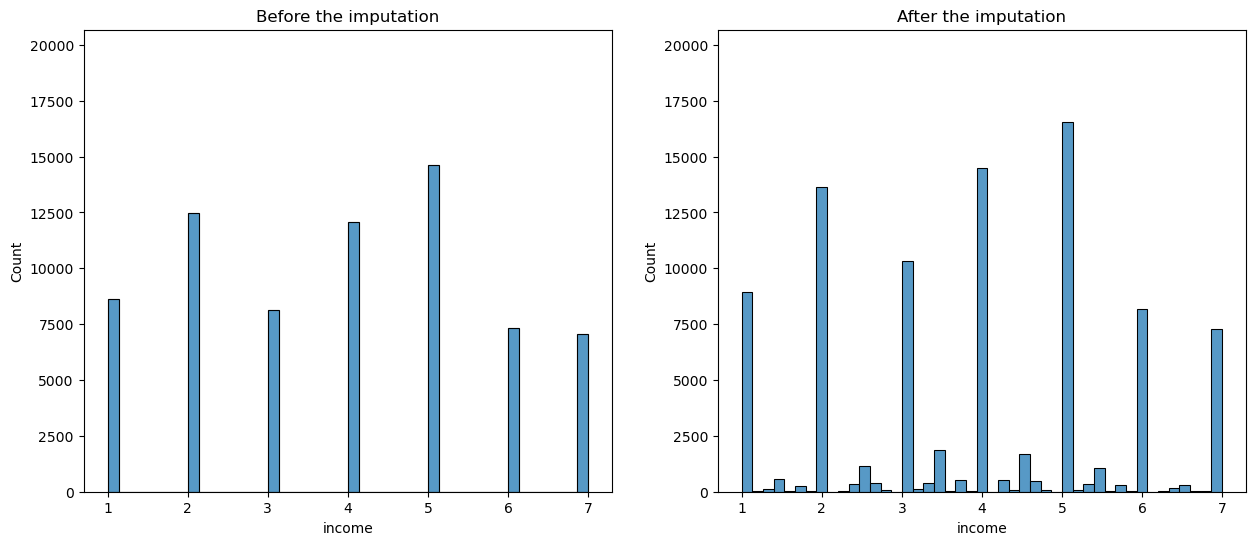

In [48]:
compare_imputation('income', numericals, new_linear)

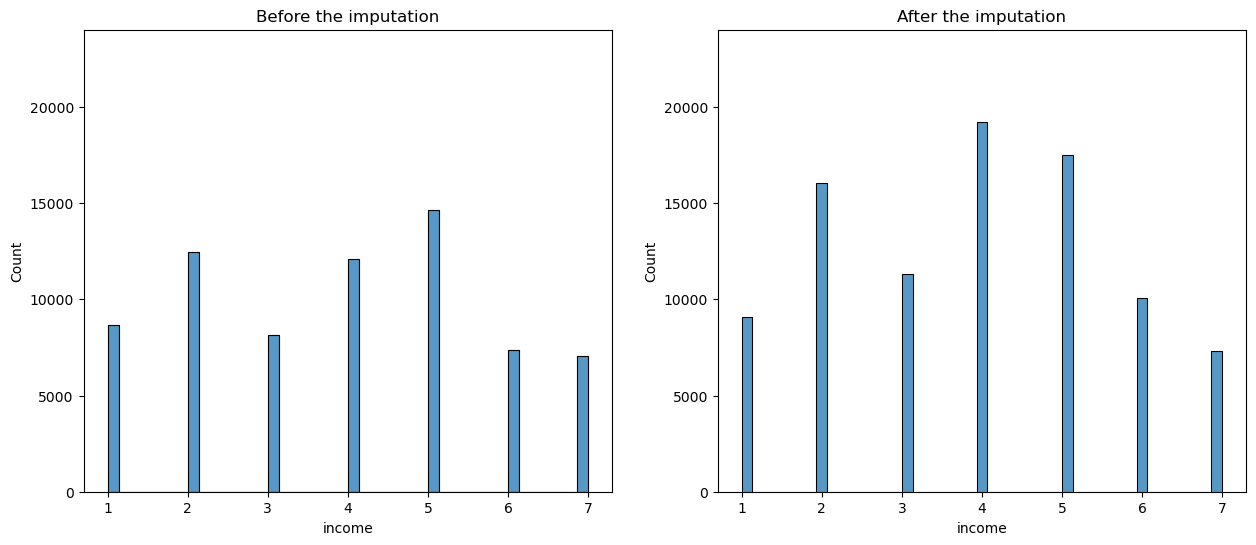

In [49]:
new_linear_round = round(numericals['income'].interpolate())
compare_imputation('income', numericals, new_linear_round)

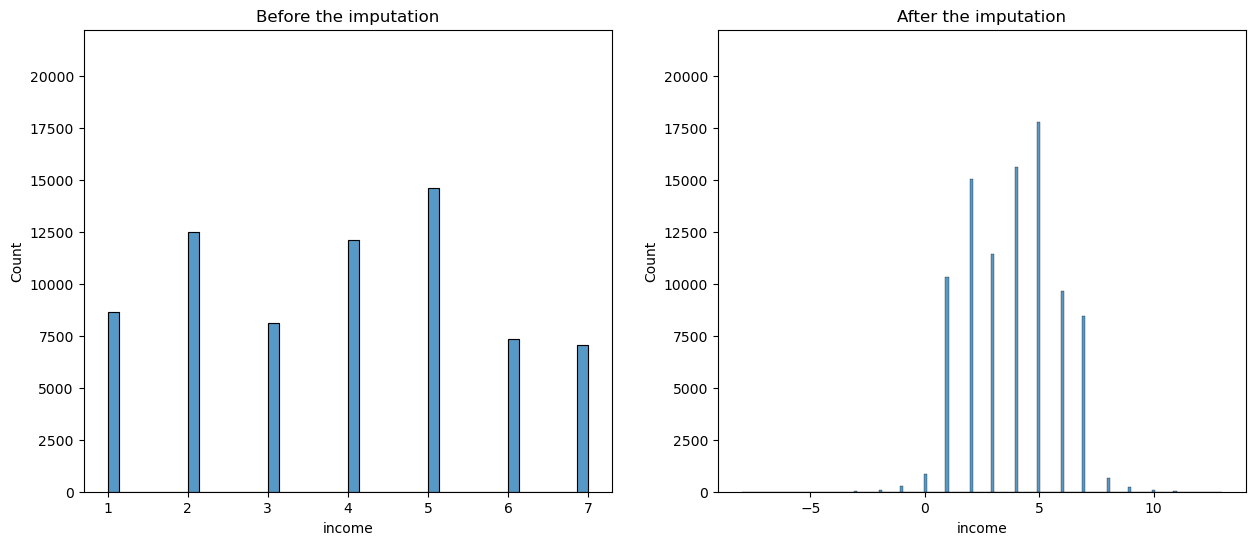

In [51]:
new_quadratic = round(numericals['income'].interpolate(method='quadratic'))
compare_imputation('income', numericals, new_quadratic)

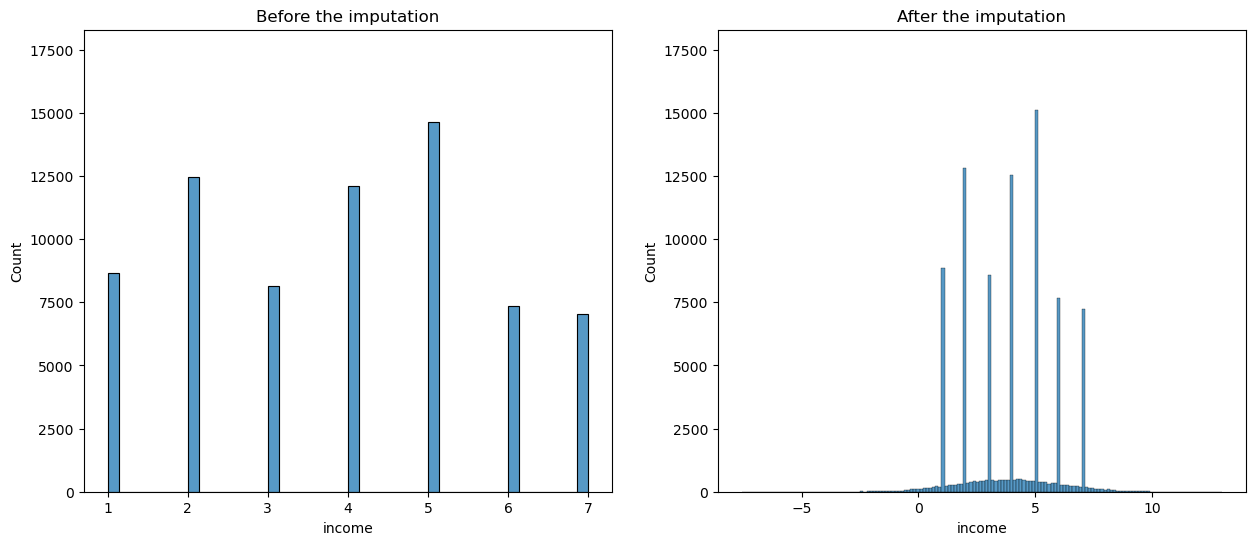

In [54]:
new_poli = numericals['income'].interpolate(method='polynomial', order=2)
compare_imputation('income', numericals, new_poli)

In [56]:
new_poli.nunique()

20189

# Using rows to fill null values - Multivariate Technique

In [67]:
numericals.corr()

,dob,income,hv1,hv2,hv3,hv4,ic1,ic2,ic3,ic4,ic5,numprom,cardprom,cardpm12,numprm12,maxadate,ngiftall,timelag,avggift
dob,1.000000,0.237885,0.003048,0.000896,0.049892,0.043548,0.098596,0.076935,0.090978,0.071483,0.019176,-0.091475,-0.078215,0.021242,-0.050024,0.066944,-0.122438,0.020114,0.020624
income,0.237885,1.000000,0.320257,0.330719,0.333951,0.317027,0.421833,0.410843,0.436721,0.423992,0.352449,-0.079350,-0.080421,-0.004260,-0.022085,0.004838,-0.125189,0.025488,0.115147
hv1,0.003048,0.320257,1.000000,0.993351,0.743331,0.726073,0.674112,0.712827,0.704212,0.723701,0.725149,-0.028515,-0.039905,0.011944,0.021386,-0.012661,-0.061114,0.017014,0.099967
hv2,0.000896,0.330719,0.993351,1.000000,0.747282,0.730050,0.681722,0.721610,0.719277,0.740637,0.739876,-0.029011,-0.040946,0.011819,0.022546,-0.013959,-0.062618,0.017883,0.102086
hv3,0.049892,0.333951,0.743331,0.747282,1.000000,0.941192,0.746354,0.719644,0.758692,0.729092,0.643973,-0.036257,-0.046405,0.005747,0.012890,-0.015430,-0.062472,0.012515,0.085160
hv4,0.043548,0.317027,0.726073,0.730050,0.941192,1.000000,0.678339,0.671142,0.701371,0.688482,0.607090,-0.035886,-0.046106,0.008116,0.014636,-0.014893,-0.060662,0.013059,0.082829
ic1,0.098596,0.421833,0.674112,0.681722,0.746354,0.678339,1.000000,0.951175,0.975360,0.929769,0.805491,-0.027508,-0.035314,0.006929,0.011291,-0.011900,-0.063875,0.021362,0.083434
ic2,0.076935,0.410843,0.712827,0.721610,0.719644,0.671142,0.951175,1.000000,0.955173,0.973696,0.873875,-0.020158,-0.028905,0.009153,0.016525,-0.012017,-0.058706,0.024058,0.087900
ic3,0.090978,0.436721,0.704212,0.719277,0.758692,0.701371,0.975360,0.955173,1.000000,0.971342,0.839980,-0.026578,-0.035150,0.006079,0.012705,-0.014334,-0.065675,0.024087,0.086453
ic4,0.071483,0.423992,0.723701,0.740637,0.729092,0.688482,0.929769,0.973696,0.971342,1.000000,0.882997,-0.018057,-0.027588,0.008358,0.018109,-0.014210,-0.058687,0.025518,0.088880


<Axes: >

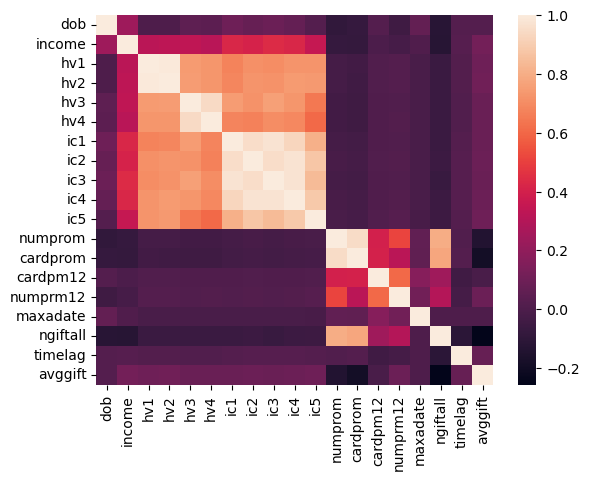

In [69]:
sns.heatmap(corr)

In [72]:
# target = income
# independent vars = hv1, ic1

y = data[~data.income.isnull()]['income']
X = data[~data.income.isnull()][['hv1', 'ic1']]

In [73]:
y

1        6.0
2        3.0
3        1.0
4        3.0
6        4.0
        ... 
90560    6.0
90562    1.0
90564    6.0
90566    7.0
90568    5.0
Name: income, Length: 70386, dtype: float64

In [74]:
X

,hv1,ic1
1,5468,1088
2,497,251
3,1000,386
4,576,240
6,484,251
...,...,...
90560,922,342
90562,341,159
90564,733,285
90566,1679,806


In [76]:
X_null = data[data.income.isnull()][['hv1','ic1']]
X_null

,hv1,ic1
0,479,307
5,807,364
9,565,291
13,677,298
19,548,197
...,...,...
90555,450,174
90561,457,263
90563,1127,224
90565,988,433


In [70]:
from sklearn.linear_model import LinearRegression

In [77]:
model = LinearRegression()
model

LinearRegression()

In [78]:
model = model.fit(X,y)

In [82]:
y_predict_train = model.predict(X)
y_predict_train

array([7.71810155, 3.41233098, 4.06954962, ..., 3.59148596, 6.00374955,
       4.34805292])

In [83]:
y

1        6.0
2        3.0
3        1.0
4        3.0
6        4.0
        ... 
90560    6.0
90562    1.0
90564    6.0
90566    7.0
90568    5.0
Name: income, Length: 70386, dtype: float64

In [84]:
model.score(X,y)

0.17991732279233608

# KNN imputer

Until now, we've been using the information of one column "INCOME" to fill out the missing values. This estrategy is using information of only one column (1d: univariate technique). However, is more likely that the value of the "INCOME" will depend on the values of the other columns for the given customer. Let's exploit this idea using the KNN model (multivariate technique).

The idea is to train a KNN model to impute the missing values of the INCOME column using the other columns (excepting AVGGIT because for a new customer we will not know AVGGIFT). This model performs several steps.

First, it will determine how similar is every customer with a missing value on the INCOME column against the other customers which doesn't have a missing value on the INCOME column. This "similarity" between customers will be based on some kind of distance [(Euclidean (default in sklearn, Manhattan,...etc)](https://www.analyticsvidhya.com/blog/2020/02/4-types-of-distance-metrics-in-machine-learning/#:~:text=The%20four%20types%20of%20distance,Minkowski%20Distance%2C%20and%20Hamming%20Distance.) involving the values of the other columns of the customers.

Second, the model will consider only the K most similar customers to the one for which we want to determine the value of INCOME. Among this subset of customers, the model will compute the mean of the INCOME column.

Finally the missing value of the INCOME column for the given customer will be filled with the previous mean.

In [86]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=3)

In [90]:
X_income = numericals.drop(['avggift','timelag'], axis=1)
X_income.head()

,dob,income,hv1,hv2,hv3,hv4,ic1,ic2,ic3,ic4,ic5,numprom,cardprom,cardpm12,numprm12,maxadate,ngiftall
0,3712,NaN,479,635,3,2,307,318,349,378,12883,74,27,6,14,9702,31
1,5202,6.0,5468,5218,12,10,1088,1096,1026,1037,36175,32,12,6,13,9702,3
2,0,3.0,497,546,2,1,251,292,292,340,11576,63,26,6,14,9702,27
3,2801,1.0,1000,1263,2,1,386,388,396,423,15130,66,27,6,14,9702,16
4,2001,3.0,576,594,4,3,240,250,293,321,9836,113,43,10,25,9702,37


In [91]:
X_income_imputed = imputer.fit_transform(X_income)

In [93]:
X_income_df = pd.DataFrame(X_income_imputed, columns = X_income.columns, index = X_income.index)
X_income_df

,dob,income,hv1,hv2,hv3,hv4,ic1,ic2,ic3,ic4,ic5,numprom,cardprom,cardpm12,numprm12,maxadate,ngiftall
0,3712.0,3.000000,479.0,635.0,3.0,2.0,307.0,318.0,349.0,378.0,12883.0,74.0,27.0,6.0,14.0,9702.0,31.0
1,5202.0,6.000000,5468.0,5218.0,12.0,10.0,1088.0,1096.0,1026.0,1037.0,36175.0,32.0,12.0,6.0,13.0,9702.0,3.0
2,0.0,3.000000,497.0,546.0,2.0,1.0,251.0,292.0,292.0,340.0,11576.0,63.0,26.0,6.0,14.0,9702.0,27.0
3,2801.0,1.000000,1000.0,1263.0,2.0,1.0,386.0,388.0,396.0,423.0,15130.0,66.0,27.0,6.0,14.0,9702.0,16.0
4,2001.0,3.000000,576.0,594.0,4.0,3.0,240.0,250.0,293.0,321.0,9836.0,113.0,43.0,10.0,25.0,9702.0,37.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90564,4803.0,6.000000,733.0,875.0,4.0,3.0,285.0,288.0,333.0,334.0,11390.0,59.0,23.0,5.0,12.0,9702.0,24.0
90565,0.0,5.333333,988.0,1025.0,6.0,6.0,433.0,481.0,499.0,535.0,18807.0,14.0,6.0,5.0,12.0,9702.0,1.0
90566,5001.0,7.000000,1679.0,1723.0,3.0,3.0,806.0,836.0,802.0,849.0,26538.0,10.0,4.0,3.0,8.0,9702.0,1.0
90567,3801.0,3.333333,376.0,377.0,4.0,3.0,263.0,264.0,319.0,345.0,12178.0,33.0,14.0,7.0,17.0,9702.0,7.0


In [94]:
X_income_df.income.unique()

array([3.        , 6.        , 1.        , 5.33333333, 4.        ,
       2.        , 1.66666667, 7.        , 3.33333333, 4.66666667,
       4.33333333, 5.        , 3.66666667, 2.33333333, 5.66666667,
       2.66666667, 1.33333333, 6.66666667, 6.33333333])

In [95]:
#Rounding KNNimpute estimated values
X_income_df['income']=X_income_df['income'].apply(lambda x: int(round(x)))
X_income_df.income.unique()

array([3, 6, 1, 5, 4, 2, 7], dtype=int64)

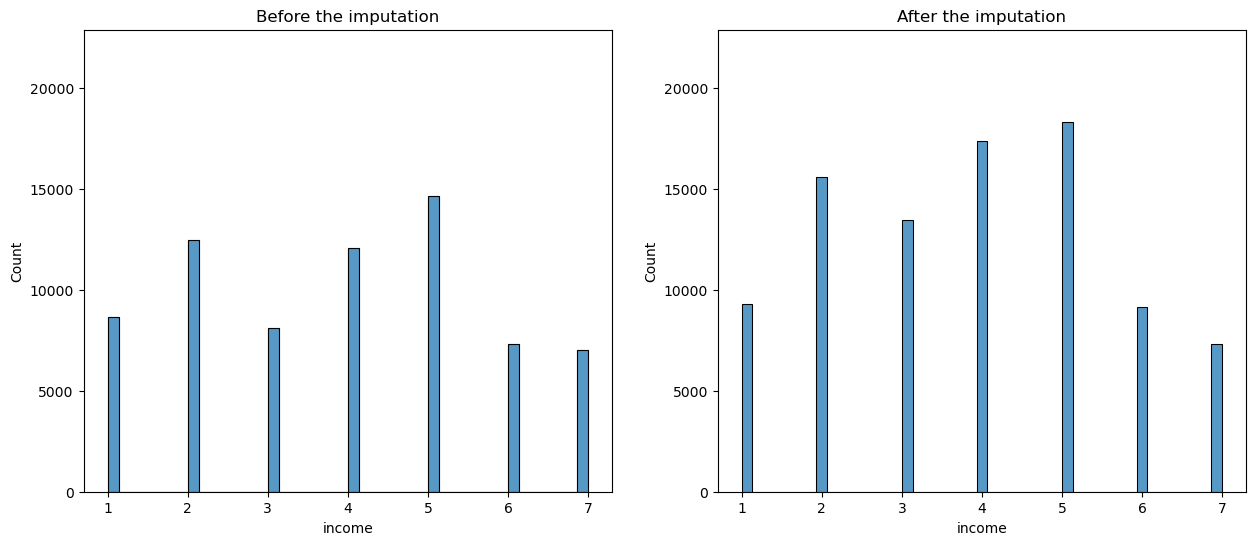

In [96]:
compare_imputation('income',numericals,X_income_df['income'])

In [98]:
numericals['income']=X_income_df['income']
numericals.isna().sum()

dob            0
income         0
hv1            0
hv2            0
hv3            0
hv4            0
ic1            0
ic2            0
ic3            0
ic4            0
ic5            0
numprom        0
cardprom       0
cardpm12       0
numprm12       0
maxadate       0
ngiftall       0
timelag     9653
avggift        0
dtype: int64

In [99]:
data['income']=numericals['income']
data.isna().sum()

state          0
pvastate       0
dob            0
mdmaud         0
recp3          0
gender         0
domain         0
income         0
homeownr       0
hv1            0
hv2            0
hv3            0
hv4            0
ic1            0
ic2            0
ic3            0
ic4            0
ic5            0
veterans       0
numprom        0
cardprom       0
cardpm12       0
numprm12       0
maxadate       0
rfa_2          0
ngiftall       0
timelag     9653
avggift        0
dtype: int64

In [100]:
#save intermediate results
data.to_csv('unit_4_income_knn.csv', index=False)